In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [3]:
print(df.shape)
df.head()

(3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.dtypes
# area code needs to be a string because they are not meant to be used in arithmetic, for ohe later
# churn needs to be converted to an integer, 1 if true 0 if flase
# voice mail plan needs to be converted to a 1 or 0
# phone number is going to be unique, will have to drop
# drop state

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [5]:
df['area code'] = df['area code'].astype(str, errors = 'ignore')

df['voice mail plan'] = np.where( df['voice mail plan']== 'yes', '1', '0')
df['international plan'] = np.where( df['international plan']== 'yes', '1', '0')


df['churn'] = df['churn'].astype(str, errors = 'ignore')
df['churn'] = np.where( df['churn']== 'True', '1', '0')

df = df.drop(['phone number','state'], axis=1)

In [6]:
df.isna().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.dtypes

account length              int64
area code                  object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                      object
dtype: object

In [8]:
df.describe(include = 'all')

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,415,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,1655,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [9]:
df[df['total day minutes'].eq(0)]

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,98,415,0,0,0,0.0,0,0.0,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4,1
1397,101,510,0,0,0,0.0,0,0.0,192.1,119,16.33,168.8,95,7.60,7.2,4,1.94,1,0


In [10]:
df[df['total eve minutes'].eq(0)]

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
2932,97,415,0,0,0,209.2,134,35.56,0.0,0,0.0,175.4,94,7.89,11.8,6,3.19,1,0


In [11]:
df[df['total night minutes'].eq(0)]

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


In [12]:
df[df['total intl minutes'].eq(0)]

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
179,70,408,0,0,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.0,3,0
343,98,408,0,1,21,64.6,98,10.98,176.1,86,14.97,244.8,84,11.02,0.0,0,0.0,2,0
488,165,510,0,0,0,242.9,126,41.29,209.8,65,17.83,228.4,126,10.28,0.0,0,0.0,1,0
595,87,408,0,1,28,151.4,95,25.74,152.4,97,12.95,250.1,109,11.25,0.0,0,0.0,1,0
712,106,415,0,0,0,114.4,104,19.45,78.3,101,6.66,232.7,78,10.47,0.0,0,0.0,2,0
878,62,415,0,0,0,281.0,66,47.77,160.6,108,13.65,77.9,74,3.51,0.0,0,0.0,1,0
1028,70,415,0,0,0,222.8,114,37.88,215.9,113,18.35,223.5,122,10.06,0.0,0,0.0,1,0
1080,114,415,0,0,0,191.5,88,32.56,175.2,78,14.89,220.3,118,9.91,0.0,0,0.0,0,0
1400,115,415,0,0,0,132.0,90,22.44,197.5,75,16.79,175.8,114,7.91,0.0,0,0.0,3,0
1564,137,510,0,0,0,97.5,95,16.58,195.8,82,16.64,288.8,78,13.00,0.0,0,0.0,1,0


In [13]:
cat_lst = ['area code','international plan', 'voice mail plan', 'churn']
con_lst = [x for x in df.columns.values if x not in cat_lst]

for x in cat_lst:
    print(df[x].value_counts(normalize = True))
    print('\n')
    

415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64


0    0.90309
1    0.09691
Name: international plan, dtype: float64


0    0.723372
1    0.276628
Name: voice mail plan, dtype: float64


0    0.855086
1    0.144914
Name: churn, dtype: float64




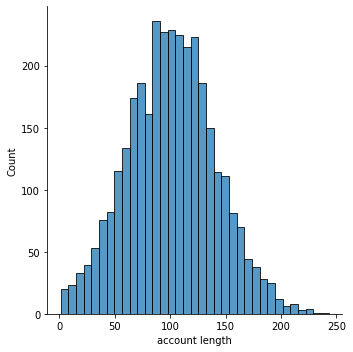

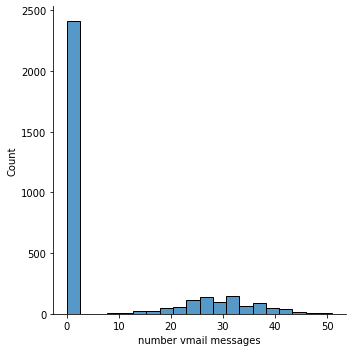

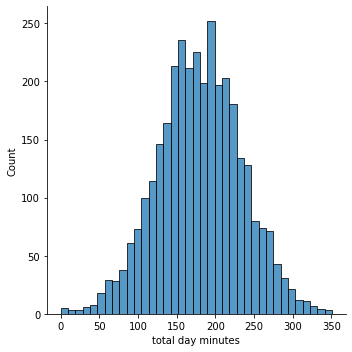

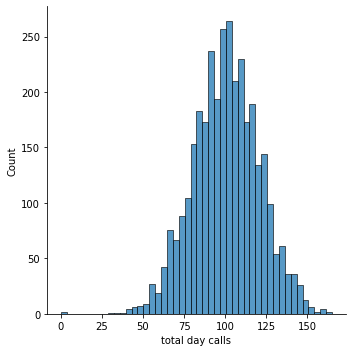

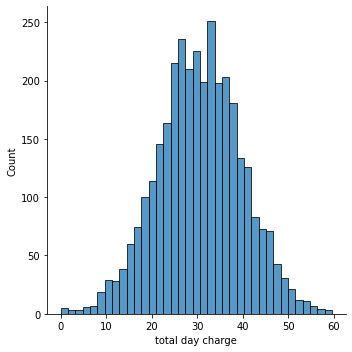

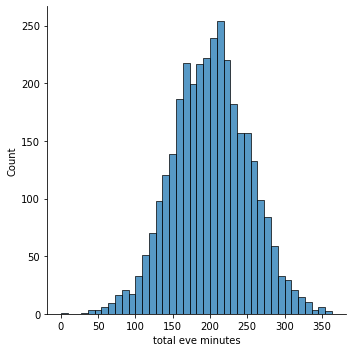

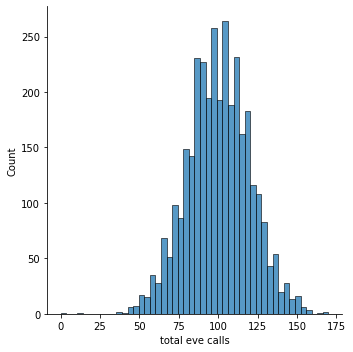

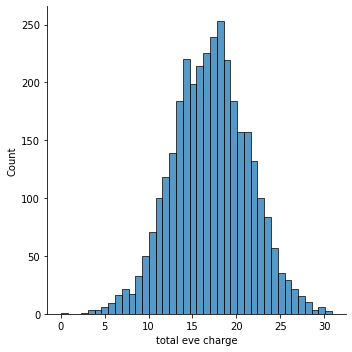

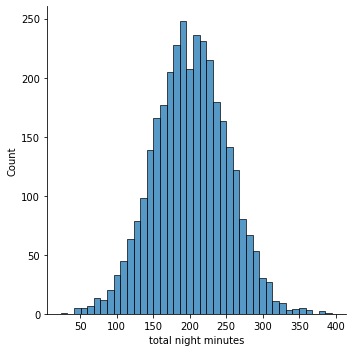

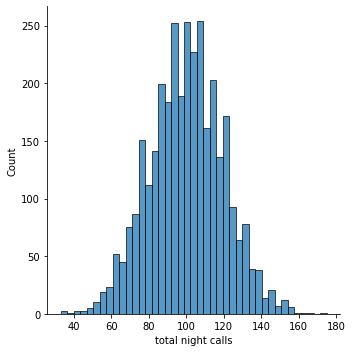

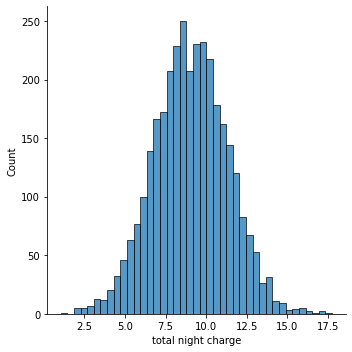

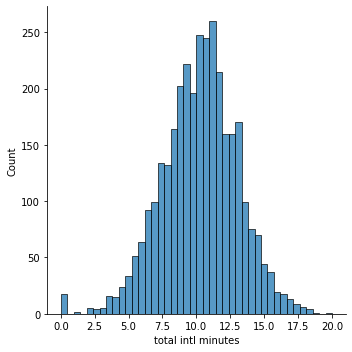

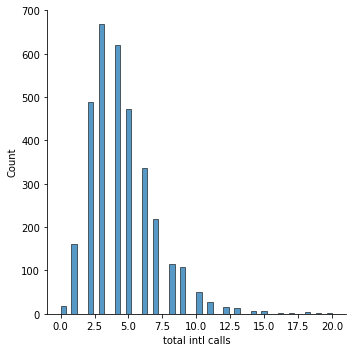

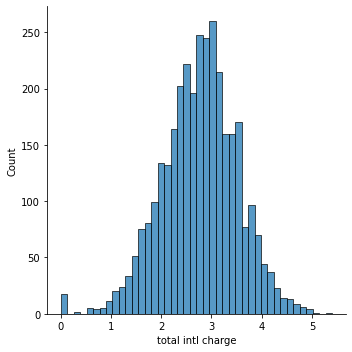

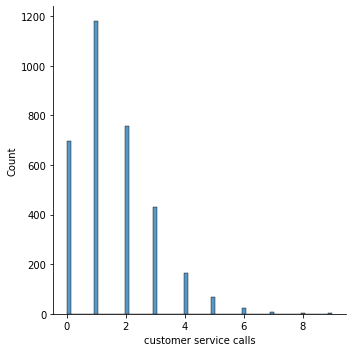

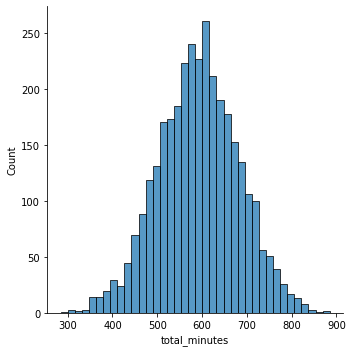

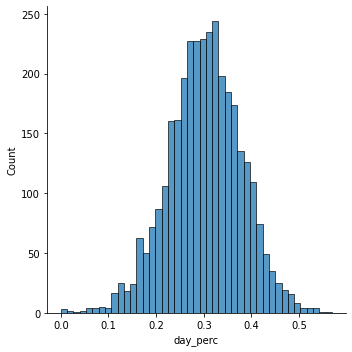

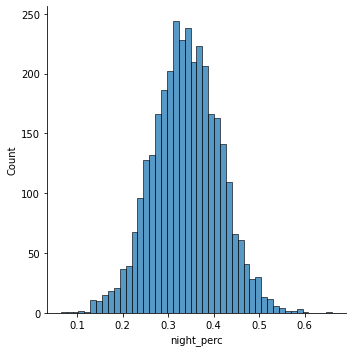

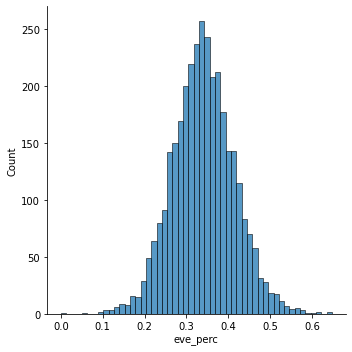

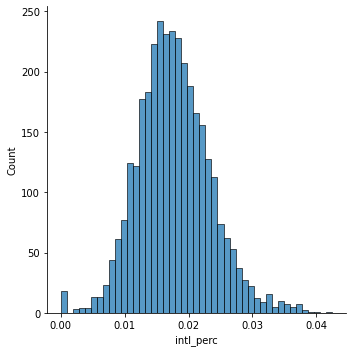

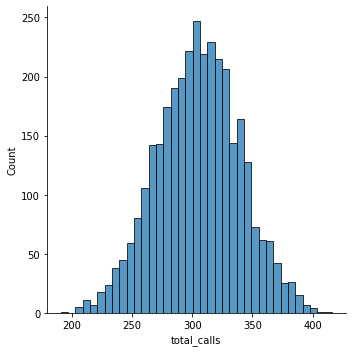

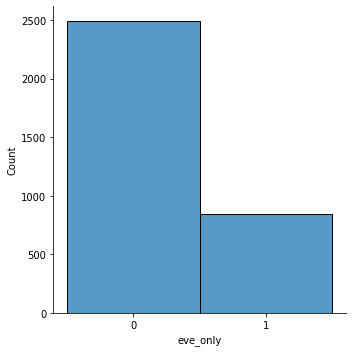

In [36]:
# run a quick for loop to look at the distributions for the continuous or semi-continuous columns
for x in con_lst:
    sb.displot(df[x])
    plt.show()

# Feature Engineering
First step is to see what the customers are being charged per minute for the different times of day

In [21]:
df['day_price'] = df['total day charge'] / df['total day minutes']
df['eve_price'] = df['total eve charge'] / df['total eve minutes']
df['night_price'] = df['total night charge'] / df['total night minutes']
df['int_price'] = df['total intl charge'] / df['total intl minutes']

df['total_minutes'] = (df['total day minutes'] + df['total eve minutes'] + df['total intl minutes'] + df['total night minutes'])
df['day_perc'] = (df['total day minutes'] / df['total_minutes'])
df['night_perc'] = (df['total night minutes'] / df['total_minutes'])
df['eve_perc'] = (df['total eve minutes'] / df['total_minutes'])
df['intl_perc'] = (df['total intl minutes'] / df['total_minutes'])


df['total_calls'] = (df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls'])
"""
The following conditionals were dervied when I created the percentage features above. Anything over the 75 percentile
is classified as this category
"""
df['night_owl'] = np.where( (df['night_perc'] >= 0.389 ) ,'1','0')
df['day_only'] = np.where( (df['day_perc'] >= 0.35 ) ,'1','0')
df['traveler'] = np.where( (df['intl_perc'] >= 0.02 ) ,'1','0')
df['eve_only'] = np.where( (df['eve_perc'] >= 0.387 ) ,'1','0')


# got rid of this column because no customer was roaming
#df['roaming'] = np.where( (df['international plan'] == 0 ) & (df['total intl calls'] > 0)   ,'1','0' )


new_lst = ['total_calls','int_price','night_price','eve_price','day_price','night_owl','day_only','traveler','total_minutes',
          'day_perc','eve_perc','night_perc','intl_perc']

df[new_lst].describe(include= 'all')

,total_calls,int_price,night_price,eve_price,day_price,night_owl,day_only,traveler,total_minutes,day_perc,eve_perc,night_perc,intl_perc
count,3333.000000,3315.000000,3333.000000,3332.000000,3331.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,2491,2441,2266,NaN,NaN,NaN,NaN,NaN
mean,305.137114,0.270057,0.045000,0.085001,0.170003,NaN,NaN,NaN,591.864776,0.302082,0.340110,0.340088,0.017721
std,34.448164,0.000329,0.000017,0.000016,0.000028,NaN,NaN,NaN,89.954251,0.076970,0.074022,0.073889,0.005666
min,191.000000,0.268182,0.044828,0.084936,0.169231,NaN,NaN,NaN,284.300000,0.000000,0.000000,0.064177,0.000000
25%,282.000000,0.269811,0.044988,0.084988,0.169989,NaN,NaN,NaN,531.500000,0.252594,0.291941,0.291169,0.014023
50%,305.000000,0.270000,0.045000,0.085000,0.170004,NaN,NaN,NaN,593.600000,0.303277,0.339044,0.339629,0.017443
75%,328.000000,0.270297,0.045013,0.085013,0.170017,NaN,NaN,NaN,652.400000,0.353689,0.387396,0.389643,0.021116


In [22]:
df[df['day_perc'].gt(0.303277)]

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,day_price,eve_price,night_price,int_price,total_minutes,day_perc,night_perc,eve_perc,intl_perc,total_calls,night_owl,day_only,traveler,eve_only
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0.170011,0.085005,0.044994,0.270000,717.2,0.369632,0.341188,0.275237,0.013943,303,0,1,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.170008,0.084983,0.045018,0.269672,539.4,0.451242,0.301446,0.224694,0.022618,333,0,1,1,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0.170007,0.084976,0.044997,0.269697,564.8,0.530099,0.348619,0.109596,0.011686,255,0,1,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.170006,0.085030,0.044997,0.270297,512.0,0.325586,0.365039,0.289648,0.019727,359,0,0,0,0
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0.170009,0.084995,0.045022,0.269841,654.2,0.341486,0.311678,0.337206,0.009630,323,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,62,408,0,0,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1,0.170009,0.085009,0.044986,0.270435,778.6,0.412407,0.231826,0.340997,0.014770,301,0,1,0,0
3325,78,408,0,0,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,0,0.170010,0.085030,0.045006,0.269892,562.9,0.343578,0.432226,0.207675,0.016522,300,1,0,0,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0.170013,0.085007,0.045008,0.269792,585.4,0.394773,0.326785,0.262043,0.016399,239,0,1,0,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,0.170019,0.085025,0.044971,0.270000,517.6,0.413060,0.268934,0.308346,0.009660,336,0,1,0,0


In [23]:
# the differences in price per each different type of call is negligible and the price categories will be dropped
# that will take care of the NaNs
df = df.drop(['day_price','eve_price','night_price','int_price'], axis=1)

In [24]:
df.isna().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
total_minutes             0
day_perc                  0
night_perc                0
eve_perc                  0
intl_perc                 0
total_calls               0
night_owl                 0
day_only                  0
traveler                  0
eve_only                  0
dtype: int64

In [25]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,day_perc,night_perc,eve_perc,intl_perc,total_calls,night_owl,day_only,traveler,eve_only
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,0.369632,0.341188,0.275237,0.013943,303,0,1,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,0.258477,0.406910,0.312700,0.021913,332,1,0,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,0.451242,0.301446,0.224694,0.022618,333,0,1,1,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8,0.530099,0.348619,0.109596,0.011686,255,0,1,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0,0.325586,0.365039,0.289648,0.019727,359,0,0,0,0


In [26]:
df.describe(include = 'all')

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,day_perc,night_perc,eve_perc,intl_perc,total_calls,night_owl,day_only,traveler,eve_only
count,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333,3333,3333
unique,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2
top,NaN,415,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
freq,NaN,1655,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,NaN,NaN,NaN,NaN,NaN,NaN,2491,2441,2266,2492
mean,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN,591.864776,0.302082,0.340088,0.340110,0.017721,305.137114,NaN,NaN,NaN,NaN
std,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN,89.954251,0.076970,0.073889,0.074022,0.005666,34.448164,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN,284.300000,0.000000,0.064177,0.000000,0.000000,191.000000,NaN,NaN,NaN,NaN
25%,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN,531.500000,0.252594,0.291169,0.291941,0.014023,282.000000,NaN,NaN,NaN,NaN
50%,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN,593.600000,0.303277,0.339629,0.339044,0.017443,305.000000,NaN,NaN,NaN,NaN
75%,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN,652.400000,0.353689,0.389643,0.387396,0.021116,328.000000,NaN,NaN,NaN,NaN


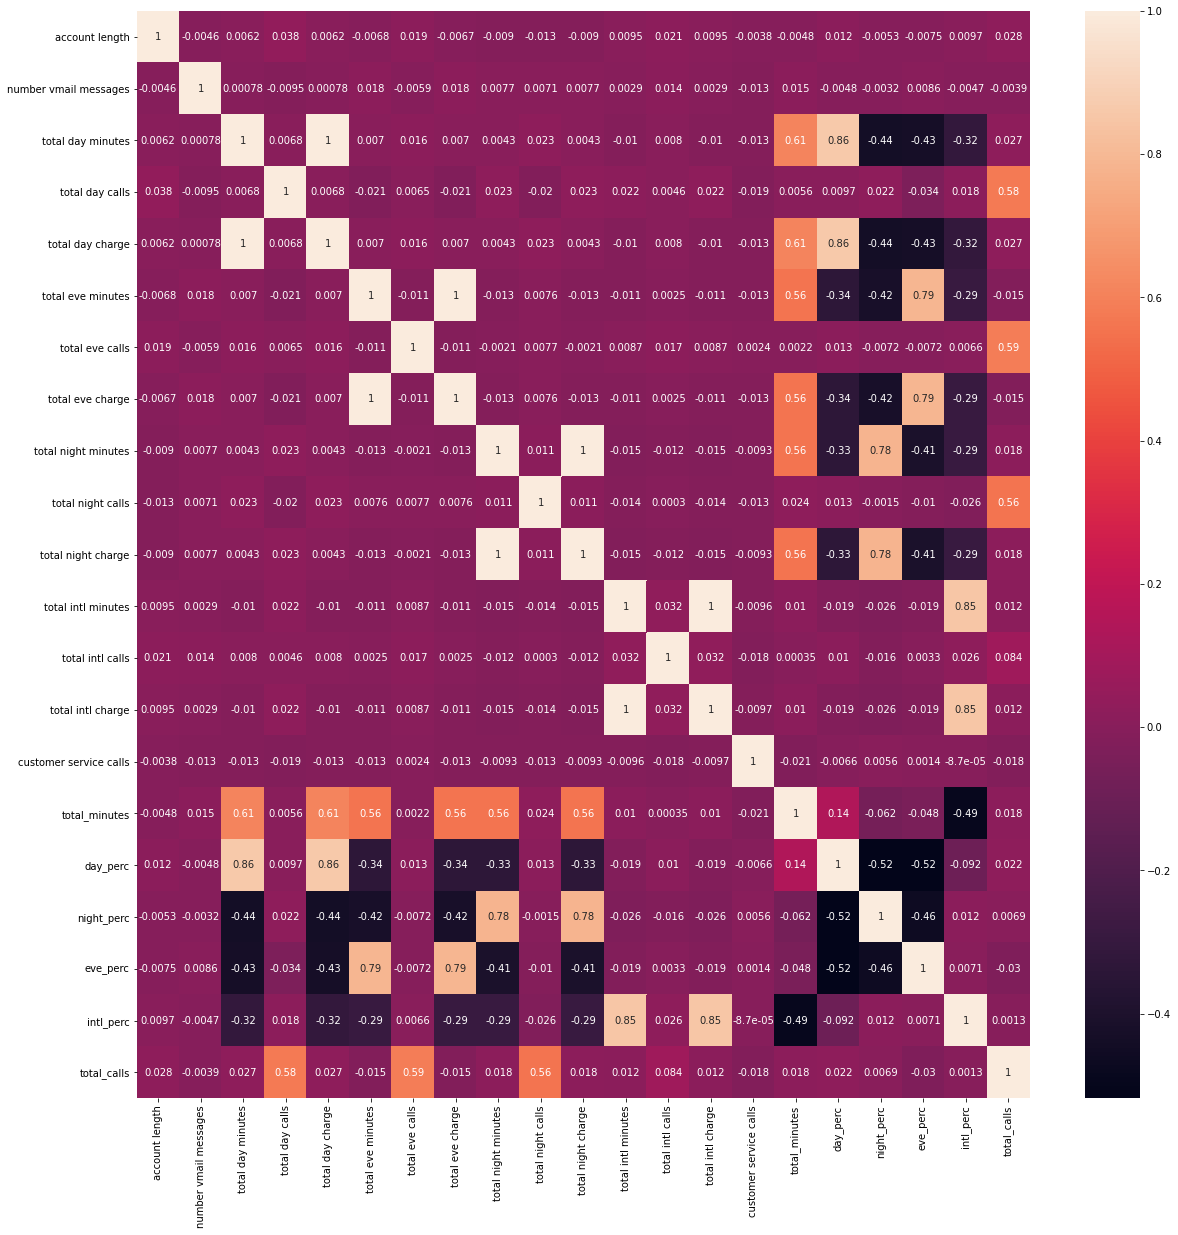

In [27]:
corr = df.corr()
fig,ax = plt.subplots(figsize = (20,20))
sb.heatmap(corr,annot = True)
plt.show()

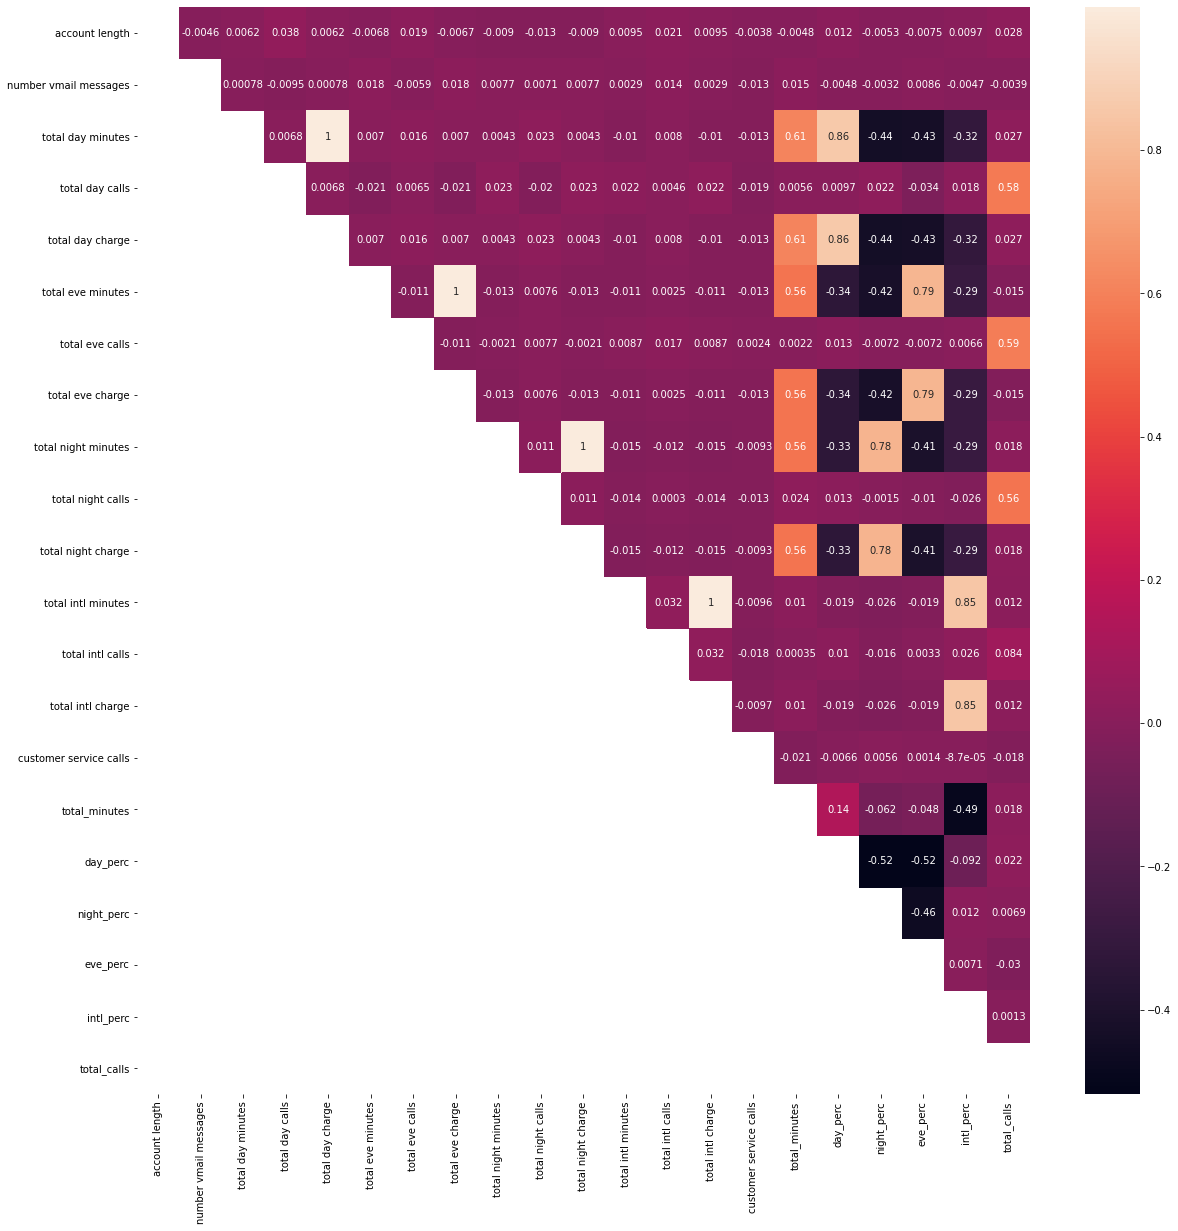

In [28]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
fig,ax = plt.subplots(figsize = (20,20))
sb.heatmap(upper_tri,annot = True)
plt.show()

In [29]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)] 
print(to_drop)

['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'day_perc', 'intl_perc']


In [30]:
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_minutes,day_perc,night_perc,eve_perc,intl_perc,total_calls,night_owl,day_only,traveler,eve_only
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,717.2,0.369632,0.341188,0.275237,0.013943,303,0,1,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,625.2,0.258477,0.406910,0.312700,0.021913,332,1,0,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,539.4,0.451242,0.301446,0.224694,0.022618,333,0,1,1,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,564.8,0.530099,0.348619,0.109596,0.011686,255,0,1,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,512.0,0.325586,0.365039,0.289648,0.019727,359,0,0,0,0


In [31]:
features = [x for x in df.columns.values if x not in to_drop]


df1 = df[features]
df1.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total_minutes,night_perc,eve_perc,total_calls,night_owl,day_only,traveler,eve_only
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,717.2,0.341188,0.275237,303,0,1,0,0
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,625.2,0.406910,0.312700,332,1,0,1,0
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,539.4,0.301446,0.224694,333,0,1,1,0
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,564.8,0.348619,0.109596,255,0,1,0,0
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,512.0,0.365039,0.289648,359,0,0,0,0


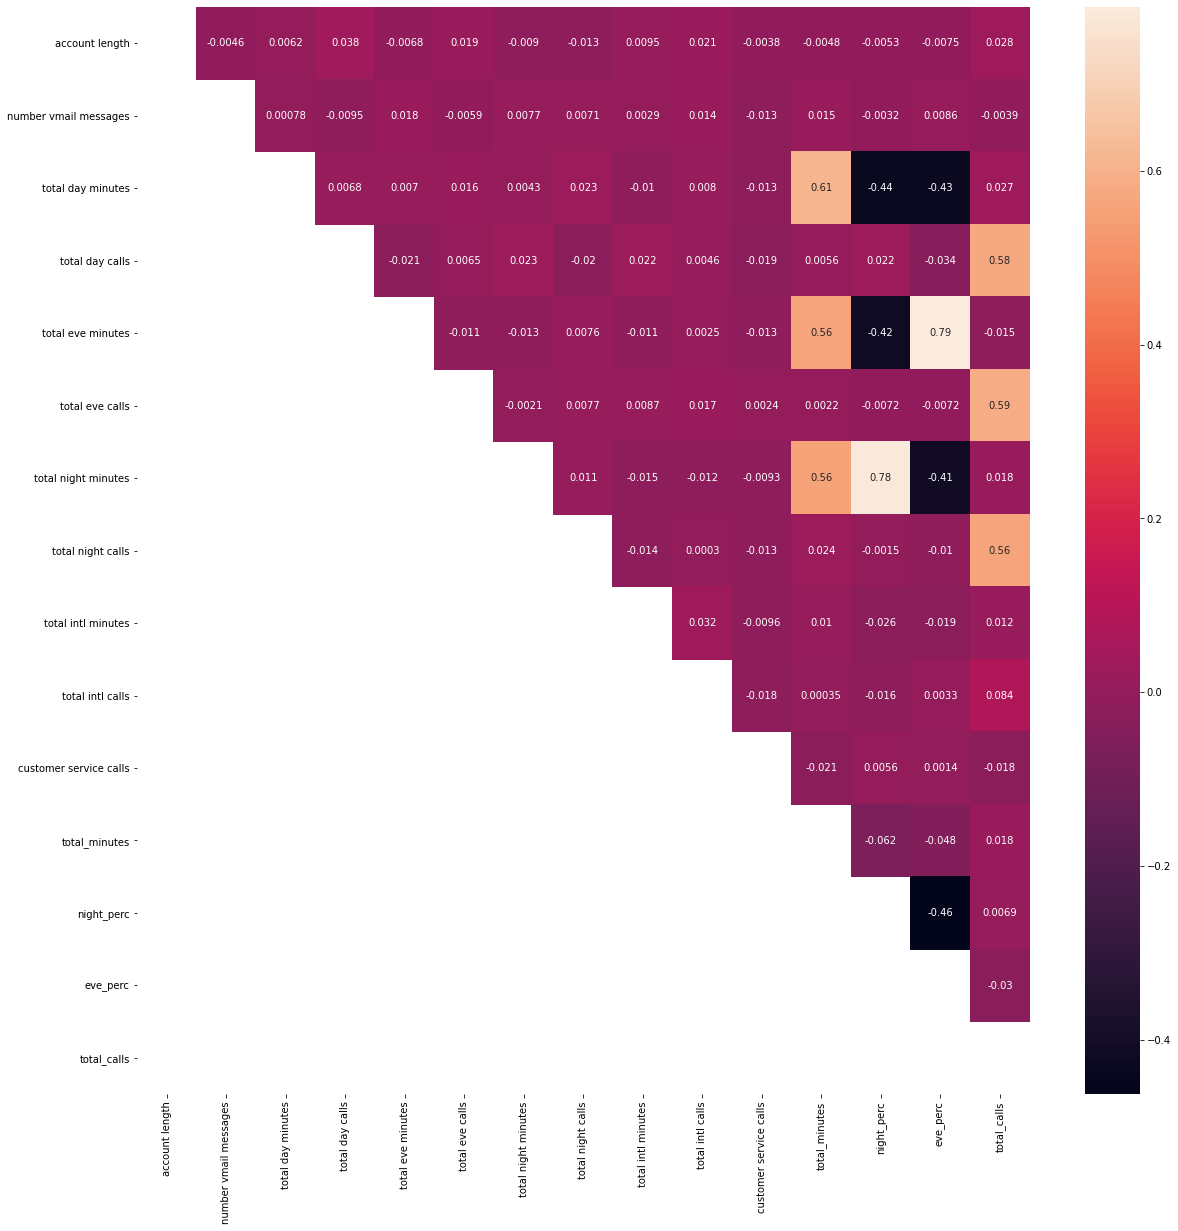

In [32]:
corr = df1.corr()
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
fig,ax = plt.subplots(figsize = (20,20))
sb.heatmap(upper_tri,annot = True)
plt.show()

In [33]:
df1.describe(include= 'all')

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total_minutes,night_perc,eve_perc,total_calls,night_owl,day_only,traveler,eve_only
count,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333,3333,3333,3333
unique,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,2,2,2,2
top,NaN,415,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0
freq,NaN,1655,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850,NaN,NaN,NaN,NaN,2491,2441,2266,2492
mean,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,NaN,591.864776,0.340088,0.340110,305.137114,NaN,NaN,NaN,NaN
std,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,NaN,89.954251,0.073889,0.074022,34.448164,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,NaN,284.300000,0.064177,0.000000,191.000000,NaN,NaN,NaN,NaN
25%,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,NaN,531.500000,0.291169,0.291941,282.000000,NaN,NaN,NaN,NaN
50%,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,NaN,593.600000,0.339629,0.339044,305.000000,NaN,NaN,NaN,NaN
75%,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,NaN,652.400000,0.389643,0.387396,328.000000,NaN,NaN,NaN,NaN


In [34]:
cat_lst = ['area code','international plan', 'voice mail plan', 'churn','night_owl','day_only','traveler']
con_lst = [x for x in df.columns.values if x not in cat_lst]

for x in cat_lst:
    print(df[x].value_counts(normalize = True))
    print('\n')
    


415    0.496550
510    0.252025
408    0.251425
Name: area code, dtype: float64


0    0.90309
1    0.09691
Name: international plan, dtype: float64


0    0.723372
1    0.276628
Name: voice mail plan, dtype: float64


0    0.855086
1    0.144914
Name: churn, dtype: float64


0    0.747375
1    0.252625
Name: night_owl, dtype: float64


0    0.732373
1    0.267627
Name: day_only, dtype: float64


0    0.679868
1    0.320132
Name: traveler, dtype: float64




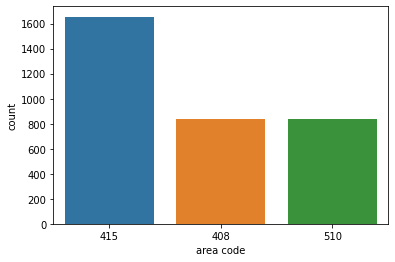

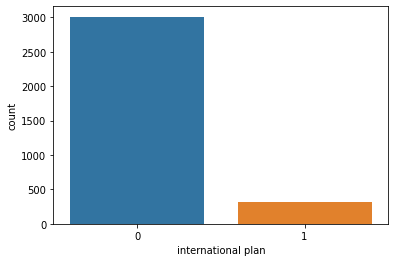

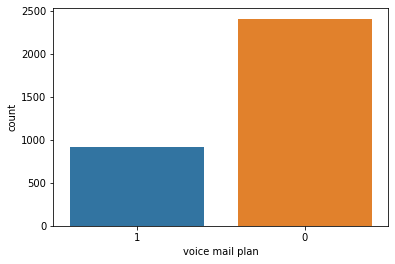

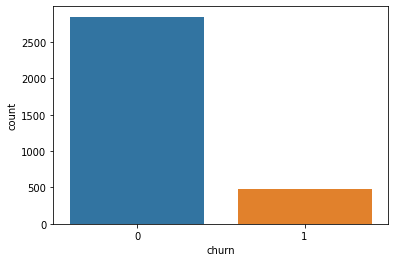

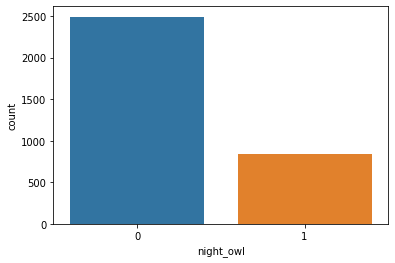

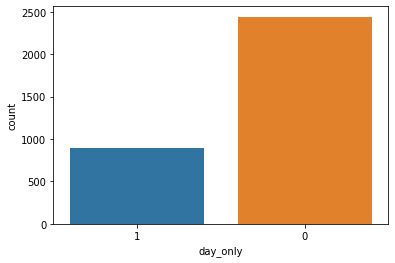

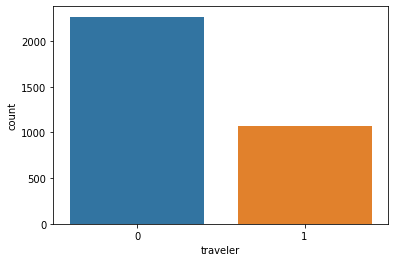

In [39]:

for i in cat_lst:
    sb.countplot(x = df[i])
    plt.show()